In [1]:
import pandas as pd
from preprocessing import set_discrete_columns, remove_outliers
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset/cardio_train.csv", sep=";", index_col=0)
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df = remove_outliers(df, ["ap_hi", "ap_lo", "weight", "height"], 3)
df = remove_outliers(df, ["ap_hi", "ap_lo"], 5)

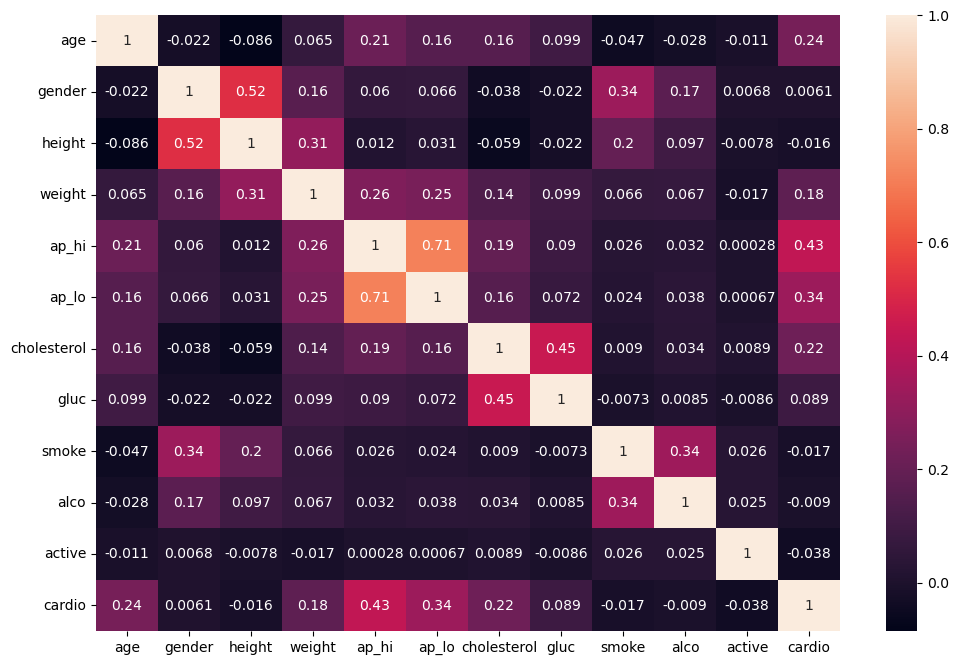

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

In [5]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000
mean,19466.134575,1.346999,164.371672,73.556404,126.435076,81.247264,1.361877,1.223292,0.087242,0.053147,0.804019,0.492293
std,2467.750306,0.476019,7.688308,13.189444,16.506380,9.381481,0.677049,0.569191,0.282191,0.224328,0.396957,0.499944
min,10798.000000,1.000000,140.000000,32.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17659.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,215.000000,130.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df, new_df = set_discrete_columns(df, ["height", "weight", "ap_hi", "ap_lo"])

In [7]:
df.describe()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,height_group,weight_group,ap_hi_group,ap_lo_group
count,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000
mean,19466.134575,1.346999,1.361877,1.223292,0.087242,0.053147,0.804019,0.492293,3.055189,6.334402,3.691613,3.124243
std,2467.750306,0.476019,0.677049,0.569191,0.282191,0.224328,0.396957,0.499944,1.155537,2.208857,1.162849,0.930254
min,10798.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17659.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,5.000000,3.000000,3.000000
50%,19702.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,6.000000,3.000000,3.000000
75%,21324.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.000000,8.000000,5.000000,4.000000
max,23713.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,6.000000,13.000000,9.000000,7.000000


In [11]:
print(interval_dict)

{'height': id
988      (153.714, 160.571]
989      (160.571, 167.429]
990      (160.571, 167.429]
991      (160.571, 167.429]
992      (153.714, 160.571]
                ...        
99992    (160.571, 167.429]
99993    (167.429, 174.286]
99996      (181.143, 188.0]
99998    (160.571, 167.429]
99999    (167.429, 174.286]
Name: height, Length: 67078, dtype: category
Categories (7, interval[float64, right]): [(139.952, 146.857] < (146.857, 153.714] < (153.714, 160.571] < (160.571, 167.429] < (167.429, 174.286] < (174.286, 181.143] < (181.143, 188.0]], 'weight': id
988          (68.429, 74.5]
989          (68.429, 74.5]
990          (68.429, 74.5]
991        (80.571, 86.643]
992        (56.286, 62.357]
                ...        
99992        (74.5, 80.571]
99993        (74.5, 80.571]
99996    (104.857, 110.929]
99998        (68.429, 74.5]
99999        (68.429, 74.5]
Name: weight, Length: 67078, dtype: category
Categories (14, interval[float64, right]): [(31.915, 38.071] < (38.071, 44.143]